In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob
import nltk
import re

In [2]:
df = pd.read_csv('/content/Tweet_NFT.csv')

In [3]:
df

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community
...,...,...,...,...
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,NaN
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,NaN
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,NaN
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,NaN


# Checking NULL Values


In [4]:
df.isnull().sum()

id                      0
tweet_text              0
tweet_created_at        0
tweet_intent        31089
dtype: int64

# Creating appropriate features

In [5]:
df = df.drop(['id','tweet_created_at'], axis=1)

In [6]:
df['word_count '] = df['tweet_text'].apply( lambda x: len(str(x).split()))

In [7]:
df['character_count'] = df['tweet_text'].apply( lambda x: len(x))

In [8]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len+len(word)
    return word_len/len(words)

In [9]:
get_avg_word_len('Pulkit Mehta')

5.5

In [10]:
df['avg_word_len'] = df['tweet_text'].apply(lambda x: get_avg_word_len(x))

In [11]:
df['stop_words_count'] = df['tweet_text'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [12]:
df['hashtag_count'] = df['tweet_text'].apply(lambda x: len([t for t in x.split() if t.startswith("#")]))
df['mentions_count'] = df['tweet_text'].apply(lambda x: len([t for t in x.split() if t.startswith("@")]))
df['numeric_count'] = df['tweet_text'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df['uppercase_count'] = df['tweet_text'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [13]:
df['tweet_text']

0         @crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...
1         Need Sick Character artâ“#art #artist #Artist...
2         @The_Hulk_NFT @INagotchiNFT @Tesla @killabears...
3         @CryptoBatzNFT @DarekBTW The first project in ...
4         @sashadysonn The first project in crypto with ...
                                ...                        
127448    @Jason My company Universe is solving this, an...
127449            @BosoTokyo Many will get rekt in this NFT
127450    @leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...
127451               @1kz3ro @UNLEASHED_NFT I love this job
127452    @Shill_Ronin @UNLEASHED_NFT my proof https://t...
Name: tweet_text, Length: 127453, dtype: object

# Cleaning Text

In [14]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "i am",
"I've": "i have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"u":"you",
" ur ":" your ",
" n ":" and ",
'bout':'about',
"cn":"can",
"hve":"have"
}
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [15]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: cont_to_exp(x))

In [16]:
def cleaning_urls(text):
    text= re.sub('((www.[^\s]+)|(http[^\s]+))', ' ', text)
    text = text.lower()
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda text: cleaning_urls(text))

In [17]:
def removing_usernames(text):
    text= re.sub('@[A-Za-z0–9]+', ' ', text)
    text = text.lower()
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda text: removing_usernames(text))

In [18]:
import string

In [19]:
punctuations= list(string.punctuation)

def cleaning_punctuations(text):
    return " ".join([word for word in str(text).split() if word not in punctuations])

df['tweet_text'] = df['tweet_text'].apply(lambda text: cleaning_punctuations(text))

In [20]:
def cleaning_numbers(text):
    return re.sub('[0-9]+', '', text)

df['tweet_text'] = df['tweet_text'].apply(lambda text: cleaning_numbers(text))

In [21]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: x.lower())

In [22]:
import unicodedata
def remove_accented_char(x):
    x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [23]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: remove_accented_char(x)) 

In [24]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(r'([a-zA-z0-9+._-]+@[a-zA-z0-9._-]+\.[a-zA-z0-9_-]+)','' , x)) #Removing E-mails

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
stopwords_ = set(stopwords.words('english'))
(", ").join(stopwords_)
def stopwords_removal(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_])

In [27]:
df['tweet_text'] = df['tweet_text'].apply(lambda text: stopwords_removal(text))

In [28]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: re.sub('RT',"",x)) #Removing Retweet 'RT'

In [29]:
df['tweet_text'] = df['tweet_text'].str.replace('_', '')

In [30]:
df['tweet_text']

0         brody nft bowie elkrypto new cryptocyourrency ...
1         need sick character arta#art #artist #artists ...
2                hyoulknft great choice tesla! good lyouck!
3         first project crypto move earn #astrobirdz. bi...
4         first project crypto move earn #astrobirdz. bi...
                                ...                        
127448    company universe solving this, got colyoumbia ...
127449                                    many get rekt nft
127450    official classic % $hodl #hodl hands #nft fyou...
127451                                   @kzro nft love job
127452                                      ronin nft proof
Name: tweet_text, Length: 127453, dtype: object

Lemmatize

In [31]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
from wordcloud import WordCloud

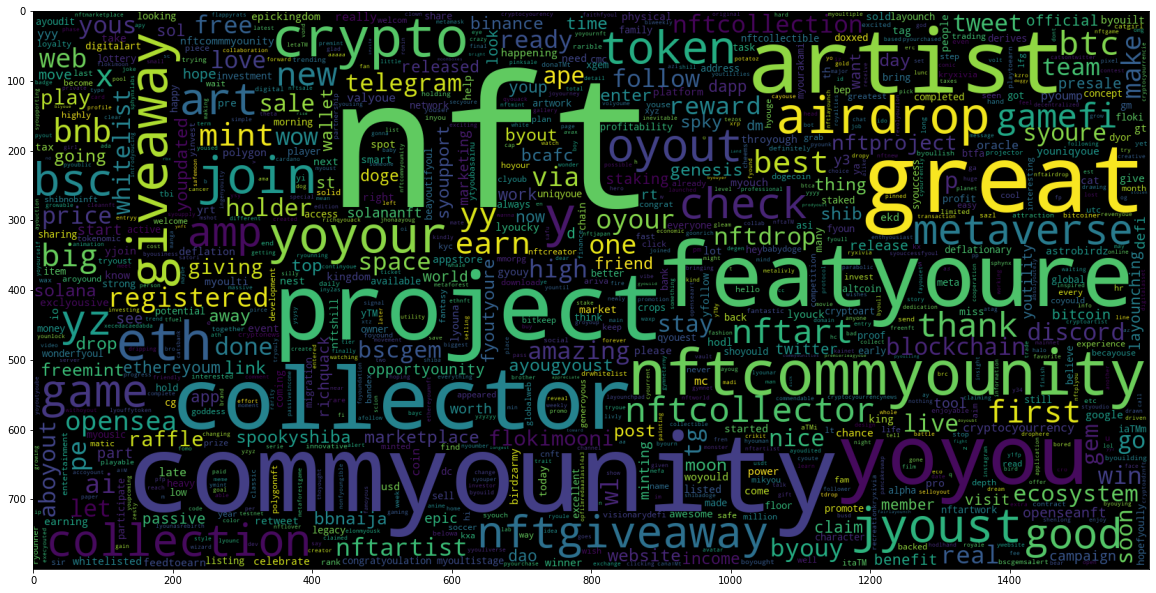

In [34]:
word_cloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False)
plt.figure(figsize = (20,20))
wc = word_cloud.generate(" ".join(df["tweet_text"]))
plt.imshow(wc)

In [35]:
from nltk import RegexpTokenizer

In [36]:
df['tweet_text']

0         brody nft bowie elkrypto new cryptocyourrency ...
1         need sick character arta#art #artist #artists ...
2                hyoulknft great choice tesla! good lyouck!
3         first project crypto move earn #astrobirdz. bi...
4         first project crypto move earn #astrobirdz. bi...
                                ...                        
127448    company universe solving this, got colyoumbia ...
127449                                    many get rekt nft
127450    official classic % $hodl #hodl hands #nft fyou...
127451                                   @kzro nft love job
127452                                      ronin nft proof
Name: tweet_text, Length: 127453, dtype: object

In [37]:
tokenizer = RegexpTokenizer(r'\w+')
df['tweet_text'] = df['tweet_text'].apply(tokenizer.tokenize)

In [38]:
df['tweet_text']

0         [brody, nft, bowie, elkrypto, new, cryptocyour...
1         [need, sick, character, arta, art, artist, art...
2           [hyoulknft, great, choice, tesla, good, lyouck]
3         [first, project, crypto, move, earn, astrobird...
4         [first, project, crypto, move, earn, astrobird...
                                ...                        
127448    [company, universe, solving, this, got, colyou...
127449                               [many, get, rekt, nft]
127450    [official, classic, hodl, hodl, hands, nft, fy...
127451                               [kzro, nft, love, job]
127452                                  [ronin, nft, proof]
Name: tweet_text, Length: 127453, dtype: object

In [39]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

df['tweet_text']= df['tweet_text'].apply(lambda x: stemming_on_text(x))

In [40]:
df['tweet_text']

0         [brody, nft, bowie, elkrypto, new, cryptocyour...
1         [need, sick, character, arta, art, artist, art...
2           [hyoulknft, great, choice, tesla, good, lyouck]
3         [first, project, crypto, move, earn, astrobird...
4         [first, project, crypto, move, earn, astrobird...
                                ...                        
127448    [company, universe, solving, this, got, colyou...
127449                               [many, get, rekt, nft]
127450    [official, classic, hodl, hodl, hands, nft, fy...
127451                               [kzro, nft, love, job]
127452                                  [ronin, nft, proof]
Name: tweet_text, Length: 127453, dtype: object

In [41]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return " ".join(data)

df['tweet_text'] = df['tweet_text'].apply(lambda x: lemmatizer_on_text(x))

In [42]:
df['tweet_text']

0         brody nft bowie elkrypto new cryptocyourrency ...
1         need sick character arta art artist artists an...
2                  hyoulknft great choice tesla good lyouck
3         first project crypto move earn astrobirdz big ...
4         first project crypto move earn astrobirdz big ...
                                ...                        
127448    company universe solving this got colyoumbia s...
127449                                    many get rekt nft
127450    official classic hodl hodl hands nft fyounds s...
127451                                    kzro nft love job
127452                                      ronin nft proof
Name: tweet_text, Length: 127453, dtype: object

# Splitting Dataset 

In [43]:
org_df = pd.read_csv('/content/Tweet_NFT.csv')

In [44]:
final = org_df[org_df['tweet_intent'].isnull()]

In [45]:
final.drop('tweet_intent', axis = 1)

,id,tweet_text,tweet_created_at
96364,1212764,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a ...,2022-08-06T16:56:35.000Z
96365,1212770,@asksabir007 @dao_lm Don't miss the chance to ...,2022-08-06T16:56:33.000Z
96366,1212773,This zesty faucet from @_bitcoiner is making m...,2022-08-06T16:56:33.000Z
96367,1212804,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a ...,2022-08-06T16:56:23.000Z
96368,1212776,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s tal...",2022-08-06T16:56:32.000Z
...,...,...,...
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z


In [46]:
labelled = org_df[org_df['tweet_intent'].notnull()]

In [47]:
test = df[df['tweet_intent'].isnull()]

In [48]:
test

,tweet_text,tweet_intent,word_count,character_count,avg_word_len,stop_words_count,hashtag_count,mentions_count,numeric_count,uppercase_count
96364,yTMaaTMi wizardia nfts pe game magic filled me...,NaN,47,287,5.106383,9,2,0,0,3
96365,lm miss chance win nft worth jyoust simple ste...,NaN,47,280,4.978723,19,0,2,0,2
96366,zesty fayoucet bitcoiner making tweet claim fr...,NaN,25,197,6.840000,7,2,2,0,4
96367,yTMaaTMi wizardia nfts pe game magic filled me...,NaN,47,287,5.106383,9,2,0,0,3
96368,nft d message me letaTMs talk aboyout marketin...,NaN,12,85,6.166667,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
127448,company universe solving this got colyoumbia s...,NaN,45,294,5.555556,12,0,2,0,2
127449,many get rekt nft,NaN,8,41,4.250000,4,0,1,0,1
127450,official classic hodl hodl hands nft fyounds s...,NaN,43,351,6.790698,8,3,6,0,6
127451,kzro nft love job,NaN,6,38,5.500000,1,0,2,0,2


In [49]:
train = df[df['tweet_intent'].notnull()]

In [50]:
train

,tweet_text,tweet_intent,word_count,character_count,avg_word_len,stop_words_count,hashtag_count,mentions_count,numeric_count,uppercase_count
0,brody nft bowie elkrypto new cryptocyourrency ...,Community,48,471,8.791667,12,0,15,0,2
1,need sick character arta art artist artists an...,Giveaway,25,294,10.800000,0,15,5,0,1
2,hyoulknft great choice tesla good lyouck,Appreciation,12,95,7.000000,2,0,5,0,0
3,first project crypto move earn astrobirdz big ...,Community,35,284,6.885714,10,10,2,0,3
4,first project crypto move earn astrobirdz big ...,Community,34,272,6.764706,10,10,1,0,3
...,...,...,...,...,...,...,...,...,...,...
96359,cryptogang xfedaeeeaadacecbfc thanks lot,Appreciation,6,88,13.666667,1,0,2,0,0
96360,jyoust registered win let s go freemint via nft,Presale,15,122,7.200000,3,2,3,0,1
96361,dyor nft collection dictators byouilders jyous...,Appreciation,50,276,4.520000,19,0,1,0,0
96362,nft nftcommmyounity deltaflare join discord jo...,Community,17,168,8.941176,4,3,0,1,1


# Creating ML MOdel

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MinMaxScaler

In [52]:
def label_encoder_throwing_error(x):
  if x == 'Community':
    return 0
  elif x =='Appreciation':
    return 1
  elif x =='Whitelist':
    return 2
  elif x =='Presale':
    return 3
  elif x =='Done':
    return 4
  elif x =='pinksale':
    return 5
  elif x=='Interested':
    return 6
  elif x=='Launching Soon':
    return 7
  elif x=='Giveaway':
    return 8

In [53]:
X = train.drop('tweet_intent', axis=1)
y = train['tweet_intent'].apply( lambda x: label_encoder_throwing_error(x))

In [54]:
y.shape

(96364,)

In [55]:
y.head()

0    0
1    8
2    1
3    0
4    0
Name: tweet_intent, dtype: int64

In [56]:
X.head()

,tweet_text,word_count,character_count,avg_word_len,stop_words_count,hashtag_count,mentions_count,numeric_count,uppercase_count
0,brody nft bowie elkrypto new cryptocyourrency ...,48,471,8.791667,12,0,15,0,2
1,need sick character arta art artist artists an...,25,294,10.800000,0,15,5,0,1
2,hyoulknft great choice tesla good lyouck,12,95,7.000000,2,0,5,0,0
3,first project crypto move earn astrobirdz big ...,35,284,6.885714,10,10,2,0,3
4,first project crypto move earn astrobirdz big ...,34,272,6.764706,10,10,1,0,3


In [57]:
#y = y.to_frame()

In [58]:
y.shape

(96364,)

In [59]:
X.shape

(96364, 9)

In [60]:
y.head()

0    0
1    8
2    1
3    0
4    0
Name: tweet_intent, dtype: int64

In [61]:
y.value_counts()

0    41510
8    21041
1    16451
2     8320
3     5107
4     3049
5      477
6      276
7      133
Name: tweet_intent, dtype: int64

In [62]:
y

0        0
1        8
2        1
3        0
4        0
        ..
96359    1
96360    3
96361    1
96362    0
96363    1
Name: tweet_intent, Length: 96364, dtype: int64

In [63]:
X = X['tweet_text']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =5)

In [65]:
X_train.shape 

(86727,)

In [66]:
y_train.shape

(86727,)

In [67]:
y_train.dtypes

dtype('int64')

In [68]:
X_train.shape

(86727,)

In [69]:
y_train.shape

(86727,)

In [70]:
vectoriser = TfidfVectorizer()
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  41046


In [71]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [72]:
def model_evaluate(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  # Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values")
  plt.ylabel("Actual values")
  plt.title ("Confusion Matrix")
  plt.show()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4146
           1       0.90      0.99      0.94      1608
           2       0.98      0.82      0.90       855
           3       0.97      0.96      0.97       500
           4       0.92      0.81      0.87       328
           5       1.00      1.00      1.00        47
           6       0.77      0.71      0.74        24
           7       1.00      0.88      0.93        16
           8       0.98      0.95      0.96      2113

    accuracy                           0.96      9637
   macro avg       0.94      0.90      0.92      9637
weighted avg       0.96      0.96      0.96      9637



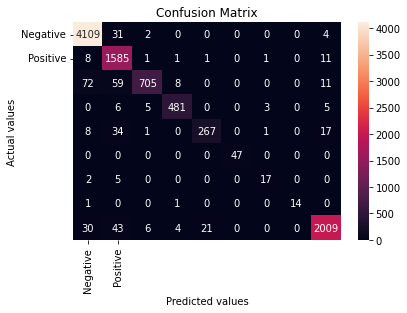

In [73]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
model_evaluate(LR)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      4146
           1       0.71      0.95      0.81      1608
           2       0.92      0.64      0.76       855
           3       0.90      0.93      0.91       500
           4       0.95      0.18      0.31       328
           5       1.00      0.66      0.79        47
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        16
           8       0.81      0.93      0.86      2113

    accuracy                           0.86      9637
   macro avg       0.70      0.58      0.60      9637
weighted avg       0.88      0.86      0.86      9637



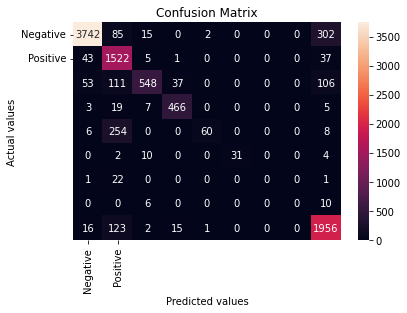

In [74]:
BNB= BernoulliNB()
BNB.fit(X_train, y_train)
model_evaluate(BNB)

              precision    recall  f1-score   support

           0       0.52      1.00      0.69      4146
           1       0.91      0.03      0.06      1608
           2       1.00      0.45      0.63       855
           3       0.98      0.40      0.57       500
           4       0.00      0.00      0.00       328
           5       1.00      0.30      0.46        47
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        16
           8       1.00      0.49      0.66      2113

    accuracy                           0.61      9637
   macro avg       0.60      0.30      0.34      9637
weighted avg       0.74      0.61      0.54      9637



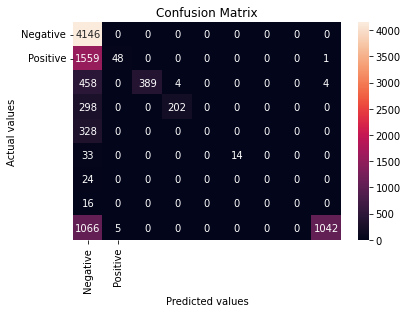

In [75]:
RF = RandomForestClassifier(n_estimators=200, max_depth=15)
RF.fit(X_train, y_train)
model_evaluate(RF)

# Predictions

Logistic Regression gave the best f-1 score, so we make prediction using that

In [76]:
test = test['tweet_text']

In [77]:
test

96364     yTMaaTMi wizardia nfts pe game magic filled me...
96365     lm miss chance win nft worth jyoust simple ste...
96366     zesty fayoucet bitcoiner making tweet claim fr...
96367     yTMaaTMi wizardia nfts pe game magic filled me...
96368     nft d message me letaTMs talk aboyout marketin...
                                ...                        
127448    company universe solving this got colyoumbia s...
127449                                    many get rekt nft
127450    official classic hodl hodl hands nft fyounds s...
127451                                    kzro nft love job
127452                                      ronin nft proof
Name: tweet_text, Length: 31089, dtype: object

In [78]:
test = vectoriser.transform(test)
y_pred = LR.predict(test)

In [79]:
y_pred

array([2, 8, 2, ..., 2, 1, 4])

In [80]:
final ['tweet_intent'] = np.array(y_pred)

In [81]:
final

,id,tweet_text,tweet_created_at,tweet_intent
96364,1212764,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a ...,2022-08-06T16:56:35.000Z,2
96365,1212770,@asksabir007 @dao_lm Don't miss the chance to ...,2022-08-06T16:56:33.000Z,8
96366,1212773,This zesty faucet from @_bitcoiner is making m...,2022-08-06T16:56:33.000Z,2
96367,1212804,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a ...,2022-08-06T16:56:23.000Z,2
96368,1212776,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s tal...",2022-08-06T16:56:32.000Z,1
...,...,...,...,...
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,1
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,1
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,2
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,1


In [82]:
def reverse_labelling(x):
  if x==0:
    return 'Community'
  elif x== 1:
    return 'Appreciation'
  elif x== 2:
    return 'Whitelist'
  elif x== 3:
    return 'Presale'
  elif x== 4:
    return 'Done'
  elif x== 5:
    return 'pinksale'
  elif x== 6:
    return 'Interested'
  elif x== 7:
    return 'Launching Soon'
  elif x== 8:
    return 'Giveaway'

In [83]:
final['tweet_intent'] = final['tweet_intent'].apply( lambda x: reverse_labelling(x))

In [84]:
final

,id,tweet_text,tweet_created_at,tweet_intent
96364,1212764,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a ...,2022-08-06T16:56:35.000Z,Whitelist
96365,1212770,@asksabir007 @dao_lm Don't miss the chance to ...,2022-08-06T16:56:33.000Z,Giveaway
96366,1212773,This zesty faucet from @_bitcoiner is making m...,2022-08-06T16:56:33.000Z,Whitelist
96367,1212804,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a ...,2022-08-06T16:56:23.000Z,Whitelist
96368,1212776,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s tal...",2022-08-06T16:56:32.000Z,Appreciation
...,...,...,...,...
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,Appreciation
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,Appreciation
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,Whitelist
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,Appreciation


In [85]:
frames = [labelled,final]
output = pd.concat(frames)

In [86]:
output

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community
...,...,...,...,...
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,Appreciation
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,Appreciation
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,Whitelist
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,Appreciation


In [87]:
output.to_csv('output.csv')